# Task 1:
## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/MultiVarLR.csv')

In [ ]:
def Adam(X, y, epochs, alpha, beta1, beta2):

  Xo = np.ones((X.shape[0], 1))
  X = np.hstack((Xo, X))
  theta = np.zeros((X.shape[1] , 1))
  Vt = 0
  Svt = 0
  from math import sqrt
  Epsilon = 1e-8
  all_theta = []

  y_pred = []
  Loss = []
  
  callback = 0


  for i in range(epochs):
    print(f"****************** Iteration {i} ******************** \n")

    h = X @ theta
    # print(f"h_shape = {h.shape}")

    y_pred.append(h)
    print(f"h(x): {h} \n")

    m = len(X)
    error =  (h - y)
    # print(f"error_shape = {error.shape}")

    print(f"Error Vector: {error} \n")

    J = 1/(2*m) * error.T @ error
    
    if (i > 0) and (abs(Loss[i - 1] - J) < 0.001):
      callback += 1
    print(f"J = {J} \n")

    d_theta = 1/m * X.T @ error
    # print(f"d_theta_shape = {d_theta.shape}")

    print(f"Gradient Vector: \n {d_theta} \n")
    
    Vt = beta1 * Vt + (1 - beta1) * d_theta
    # print(f"Vt = {Vt}, shape = {Vt.shape}")

    Svt = beta2 * Svt + (1 - beta2) * (d_theta.T @ d_theta)
    # print(f"Svt = {Svt}, shape = {Svt.shape}")

    Vcorr = Vt / (1 - beta1**(i+1))
    # print(f"Vcorr = {Vcorr}, shape = {Vcorr.shape}")
    
    Scorr = Svt / (1 - beta2**(i+1))
    # print(f"Scorr = {Scorr}, shape = {Scorr.shape}")

    
    GradVec_Norm = np.linalg.norm(d_theta)
    print(f"Gradient Vector Norm: {GradVec_Norm} \n")

    theta = theta - alpha / (sqrt(Scorr) + Epsilon) * Vcorr

    all_theta.append(theta)

    print(f"theta new : {theta}")

    Loss.append(J)

    if J <= 0.001 or GradVec_Norm <= 0.001 or callback == 2:
      break

  print("\n****************** Training Report ******************** \n")
  print(f"Gradient Descent converged after {i} epochs \n")
  print(f"theta Optm : {theta}")
  print(f"Error Vector: \n {error} \n")
  print(f"Cost = {J} \n")
  print(f"h(x) = y_predict: \n {h} \n")
  print(f"y_actual: \n {y}")

  return all_theta, y_pred, Loss, J, h, i

In [ ]:
epochs = 500
alpha = 0.01
beta1 = 0.9
beta2 = 0.999

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values.reshape(-1,1)
theta, total_pred, Loss, J, y_pred, i = Adam(X, y, epochs, alpha, beta1, beta2)

Streaming output truncated to the last 5000 lines.
 [  2.55071635]
 [  3.06950902]
 [ -0.10362017]
 [ -6.01076232]
 [  0.68222351]
 [ -6.3286046 ]
 [  0.84441949]
 [  0.12698914]
 [ -4.36587591]
 [ -3.05464154]
 [-10.41115857]
 [  4.70857152]
 [ -2.06036035]] 

J = [[7.30996049]] 

Gradient Vector: 
 [[  -1.58099403]
 [-124.7514505 ]
 [-125.03582177]
 [-141.49956104]] 

Gradient Vector Norm: 226.32168796649387 

theta new : [[0.00816939]
 [0.66119694]
 [0.66270588]
 [0.68293382]]
****************** Iteration 258 ******************** 

h(x): [[183.33044698]
 [180.62497542]
 [196.72163331]
 [139.81950109]
 [103.09743749]
 [147.25689708]
 [109.17198373]
 [171.35011099]
 [158.73031494]
 [141.8743383 ]
 [139.90493966]
 [186.6035205 ]
 [155.11336648]
 [147.93832196]
 [186.04195431]
 [147.72397106]
 [176.72149548]
 [177.89474909]
 [159.17202244]
 [172.68306745]
 [171.99409787]
 [164.63549298]
 [153.75202566]
 [189.99343483]] 

Error Vector: [[ -1.66955302]
 [  0.62497542]
 [  0.72163331]
 [ -

In [ ]:
r2_score(y_true= y, y_pred= y_pred)

0.9790414575591746

In [ ]:
theta[-1]

array([[0.00824005],
       [0.66663325],
       [0.66815471],
       [0.68966529]])

In [ ]:
theta = np.array(theta).reshape(-1,4)

In [ ]:
Loss = np.array(Loss).reshape(-1,1)

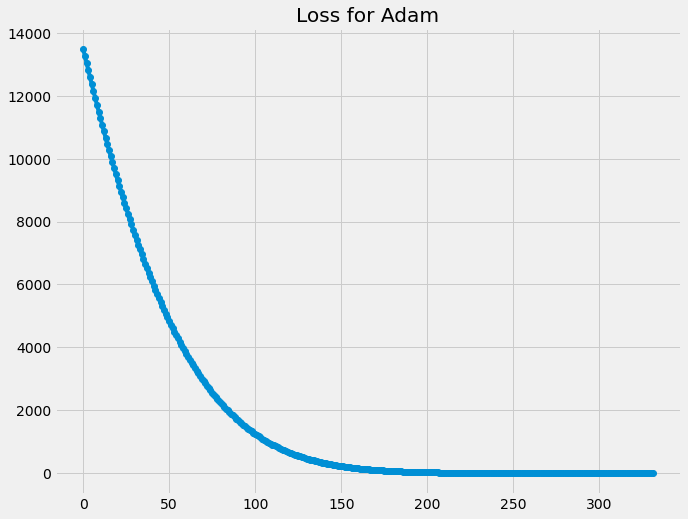

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (10,8))
plt.plot(Loss, marker = 'o')
plt.title('Loss for Adam')
plt.show()


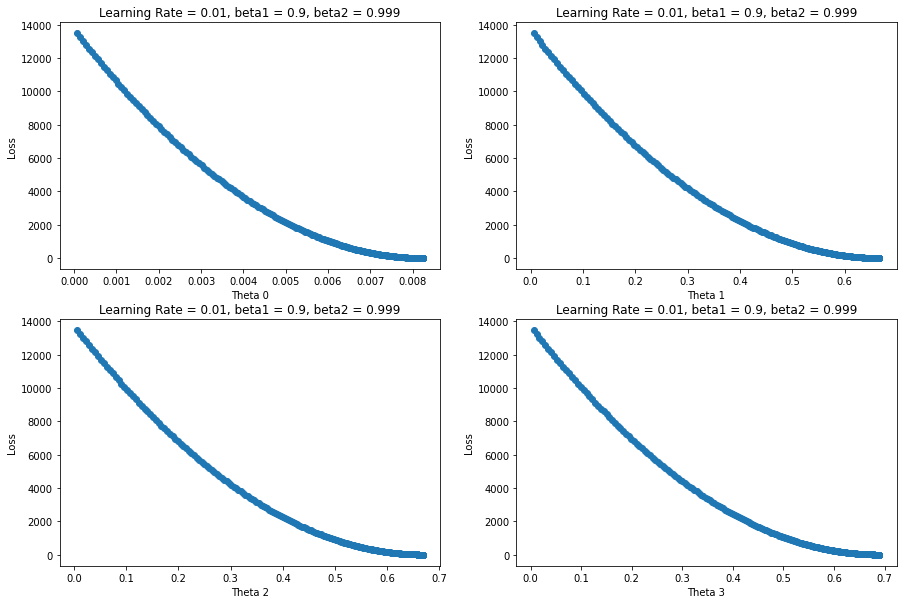

In [ ]:
plt.figure(figsize= (15, 10))

for i in range(X.shape[1] + 1):
  plt.subplot(2,2,i + 1)
  plt.plot(theta[:,i], Loss, marker = 'o')
  plt.xlabel(f'Theta {i}')
  plt.ylabel('Loss')
  
  plt.title('Learning Rate = 0.01, beta1 = 0.9, beta2 = 0.999')


# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

In [ ]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
def BFGS(X, y, epoch):

  Xo = np.ones((X.shape[0], 1))
  X = np.hstack((Xo, X))

  m = len(X)
  theta_1 = np.zeros((4,1))
  theta = np.ones((X.shape[1], 1)) * 0.01
  B = np.eye(X.shape[1])

  H = []
  all_d_theta=[]
  all_theta=[]
  Loss = []
  callback = 0

  B_inv = B.T


  h = X @ theta_1
  error = h - y
  
  J = 1 / (2 * m) * error.T @ error
  d_theta = (X.T @ error ) / len(X)


  all_d_theta.append(d_theta)  
  all_theta.append(theta_1)

  Loss.append(J[0][0])
  

  for i in range(epoch):

    print(f"****************** Iteration {i} ******************** \n")

    all_theta.append(theta)
    delta_x = all_theta[-1] - all_theta[-2]
    h = X @ theta
    H.append(h)
    print(f"h(x): {h} \n")

    error = (h - y)
    print(f"Error Vector: {error} \n")

    J = 1 / (2 * m) * error.T @ error
    print(f"J = {J} \n")

    Loss.append(J[0][0])
        
    d_theta = 1 / m * (X.T @ error)
    all_d_theta.append(d_theta)

    delta_y = all_d_theta[-1] - all_d_theta[-2]


    print(f"Gradient Vector: \n {d_theta} \n")

    GradVec_Norm = np.linalg.norm(d_theta)
    print(f"Gradient Vector Norm: {GradVec_Norm} \n")



    fraction1 = (np.eye(X.shape[1]) - ((delta_x @ delta_y.T) / (delta_y.T @ delta_x)))
    # print("fraction1 shape", fraction1.shape)
    fraction2 = (np.eye(X.shape[1]) - ((delta_y @ delta_x.T) / (delta_y.T@delta_x)))
    # print("fraction2 shape", fraction2.shape)

    fraction3 = ((delta_x@delta_x.T) / (delta_y.T@delta_x))
    # print("fraction3 shape", fraction3.shape)

    
    B_inv = fraction1 @ B_inv @ fraction2 + fraction3
    theta = theta - B_inv @ d_theta
    

    
    if (i > 0) and (abs(Loss[i - 1] - J) < 0.001):
      callback += 1
    print(f"J = {J} \n")

    if J <= 0.001 or GradVec_Norm <= 0.001 or callback == 2:
      break
    
    
    print(f"theta new : {theta}")
    

  print("\n****************** Training Report ******************** \n")
  print(f"Gradient Descent converged after {i} epochs \n")
  print(f"theta Optm : {theta}")
  print(f"Error Vector: \n {error} \n")
  print(f"Cost = {J} \n")
  print(f"h(x) = y_predict: \n {h} \n")
  print(f"y_actual: \n {y}")
  return h, all_theta, Loss

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values.reshape(-1,1)

y_pred, all_theta, Loss = BFGS(X, y, 300)

****************** Iteration 0 ******************** 

h(x): [[2.75]
 [2.71]
 [2.95]
 [2.1 ]
 [1.55]
 [2.21]
 [1.64]
 [2.57]
 [2.38]
 [2.13]
 [2.1 ]
 [2.8 ]
 [2.33]
 [2.22]
 [2.79]
 [2.22]
 [2.65]
 [2.67]
 [2.39]
 [2.59]
 [2.58]
 [2.47]
 [2.31]
 [2.85]] 

Error Vector: [[-182.25]
 [-177.29]
 [-193.05]
 [-139.9 ]
 [ -99.45]
 [-146.79]
 [-113.36]
 [-172.43]
 [-161.62]
 [-138.87]
 [-138.9 ]
 [-181.2 ]
 [-149.67]
 [-145.78]
 [-189.21]
 [-144.78]
 [-180.35]
 [-174.33]
 [-156.61]
 [-174.41]
 [-172.42]
 [-172.53]
 [-146.69]
 [-189.15]] 

J = [[13085.58351667]] 

Gradient Vector: 
 [[  -160.04333333]
 [-12962.65208333]
 [-12992.24625   ]
 [-13351.89666667]] 

Gradient Vector Norm: 22696.42196735146 

J = [[13085.58351667]] 

theta new : [[ 0.56011871]
 [-3.81862391]
 [-3.88490109]
 [ 9.47845287]]
****************** Iteration 1 ******************** 

h(x): [[185.05291594]
 [160.2373497 ]
 [201.0972034 ]
 [128.88880213]
 [140.78250913]
 [179.43325918]
 [172.23750608]
 [214.49341062]
 [261.0496060

In [ ]:
r2_score(y, y_pred)

0.9896129198609612

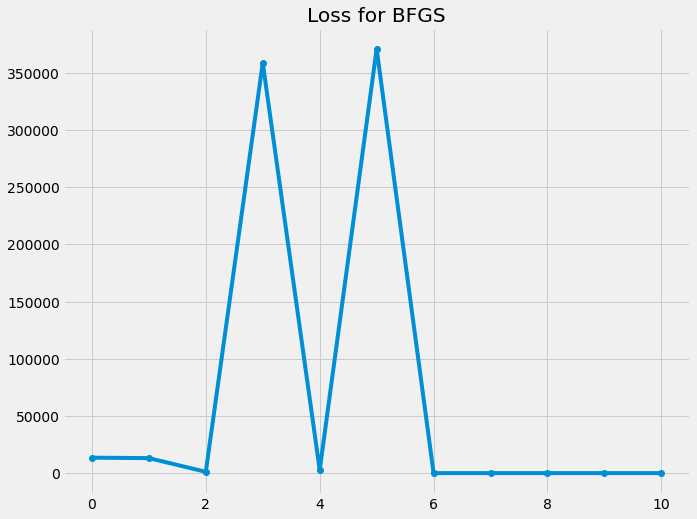

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (10,8))
plt.plot(Loss, marker = 'o')
plt.title('Loss for BFGS')
plt.show()

In [ ]:
all_theta = np.array(all_theta).reshape(-1, 4)

In [ ]:
all_theta.shape

(11, 4)

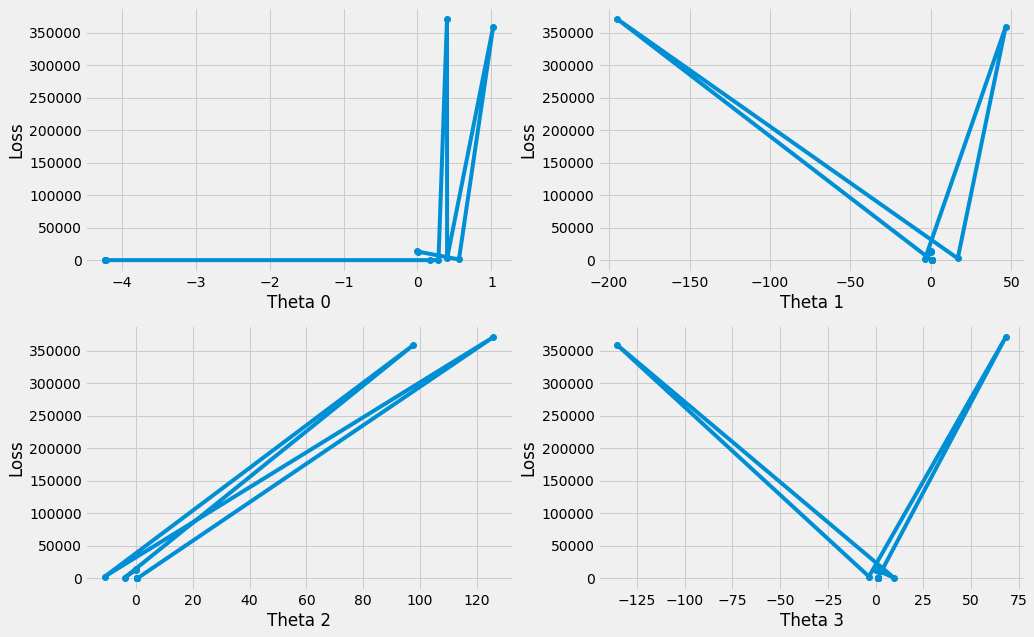

In [ ]:
plt.figure(figsize= (15, 10))

for i in range(X.shape[1] + 1):
  plt.subplot(2,2,i + 1)
  plt.plot(all_theta[:,i], Loss, marker = 'o')
  plt.xlabel(f'Theta {i}')
  plt.ylabel('Loss')